## Image Compression with KMeans Clustering

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

## Pre Processing of data

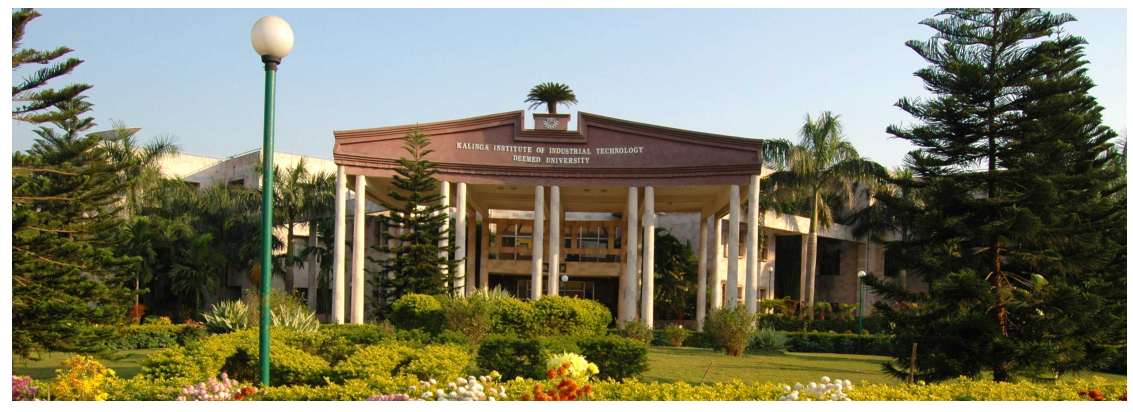

In [4]:
img = io.imread('/content/drive/MyDrive/images/4-KIIT_Campus_3.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);


In [5]:
img.shape

(1061, 3000, 3)

In [6]:
img_data = (img / 255.0).reshape(-1, 3)
img_data.shape

(3183000, 3)

In [9]:
from plot_utils import plot_utils

## Visualization of ColorSpace using all the colors present in the image

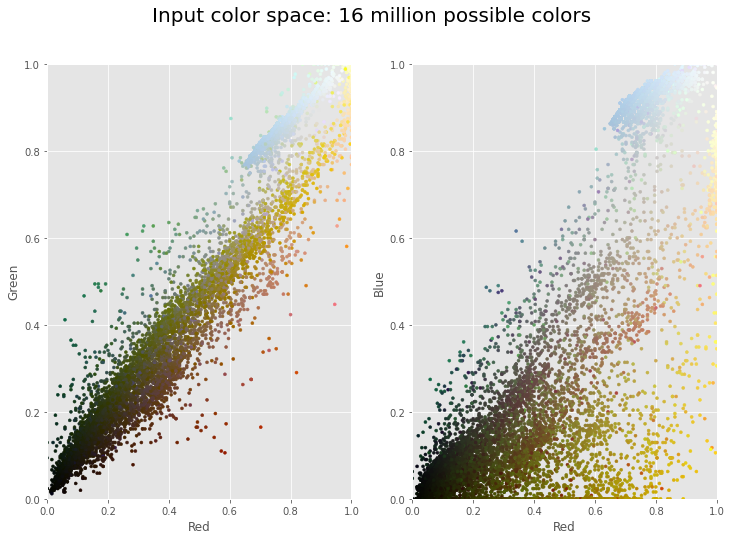

In [10]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors')
x.colorSpace()

In [11]:
from sklearn.cluster import MiniBatchKMeans

## Visualization of the KMeans reduced ColorSpace using k-clustered colors only

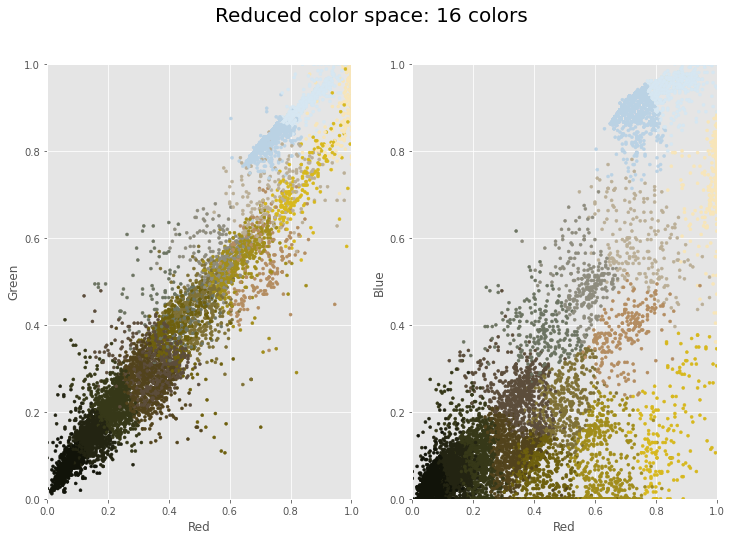

In [12]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

## Performing KMeans image compression using Interactive controls

In [13]:
img_dir = '/content/drive/My Drive/images/'

In [14]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape)) #compressed image from original image
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=30)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.50)
    plt.show()

interactive(children=(Dropdown(description='image', options=('4-KIIT_Campus_3.jpg', '1-Car.jfif', '2-Balloons.…